http://ww2.amstat.org/publications/jse/v21n1/witt.pdf

http://nsidc.org/research/bios/fetterer.html

ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/north/monthly/data/N_08_extent_v3.0.csv

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(font_scale=2)
plt.style.use('seaborn-whitegrid')
%matplotlib inline

import pandas as pd

from scipy import stats

## Read Data

In [2]:
data = pd.read_csv('N_09_extent_v3.0.csv', dtype={'year': np.int32, 'extent': np.double})

In [3]:
data.head()

,year,mo,data-type,region,extent,area
0,1979,9,Goddard,N,7.05,4.58
1,1980,9,Goddard,N,7.67,4.87
2,1981,9,Goddard,N,7.14,4.44
3,1982,9,Goddard,N,7.30,4.43
4,1983,9,Goddard,N,7.39,4.70


In [4]:
data.dtypes

year               int32
 mo                int64
    data-type     object
 region           object
 extent          float64
   area          float64
dtype: object

In [5]:
year = data['year']
extent = data[' extent']

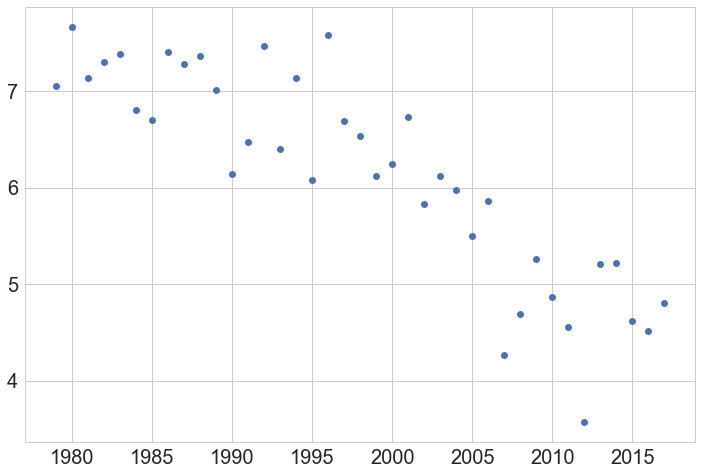

In [6]:
plt.figure(figsize=(12,8))
plt.plot(year, extent, 'o')

## Try a linear fit

-0.420718063843


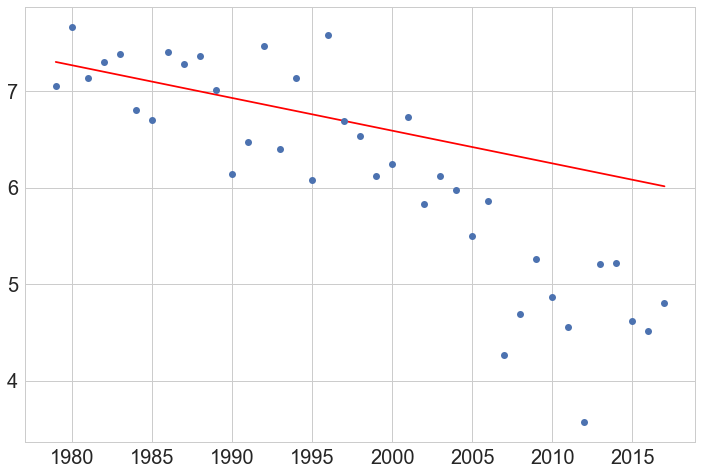

In [8]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(year[:20], extent[:20])
yfit = slope*year + intercept # linear function

plt.figure(figsize=(12,8))
plt.plot(year, yfit, 'r-')
plt.plot(year, extent, 'o')
print(rvalue)

### How far off is this fit?

In [ ]:
plt.plot(year, extent - yfit, 'o')

### How did the linear fit "fit" as time time progresses?

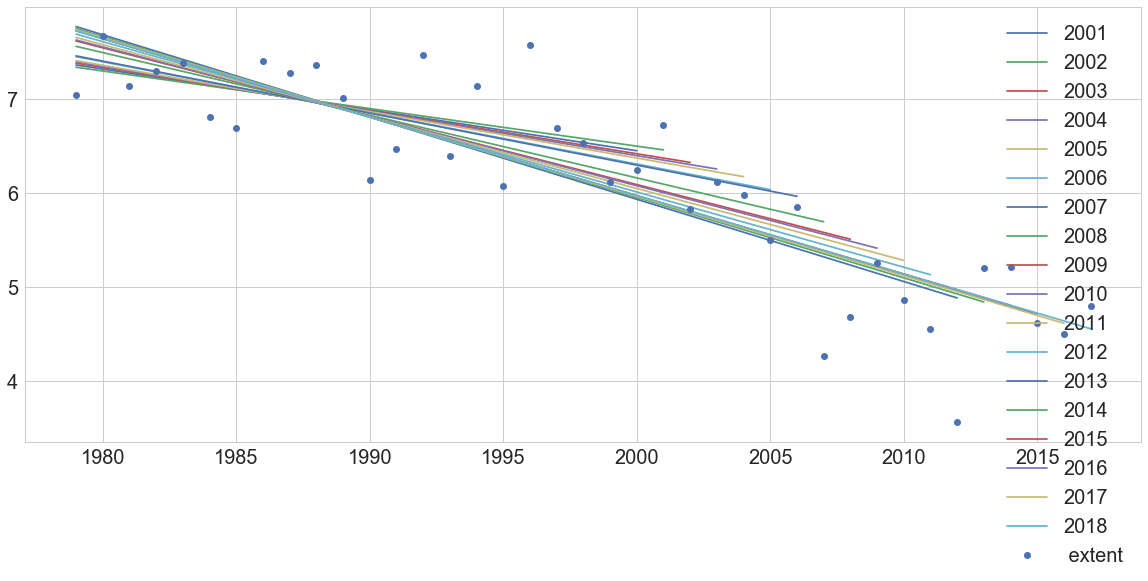

In [9]:
plt.figure(figsize=(20,8))
res = []
for y in range(22, len(extent)+1):
    slope, intercept, rvalue, pvalue, stderr = \
    stats.linregress(year[:y], extent[:y])
    yfit = slope*year[:y] + intercept

    plt.plot(year[:y], yfit, '-', label='%d' % (1979+y))

plt.plot(year[:y], extent[:y], 'o')
plt.legend()

### Let's try a quadratic fit

0.840093754531


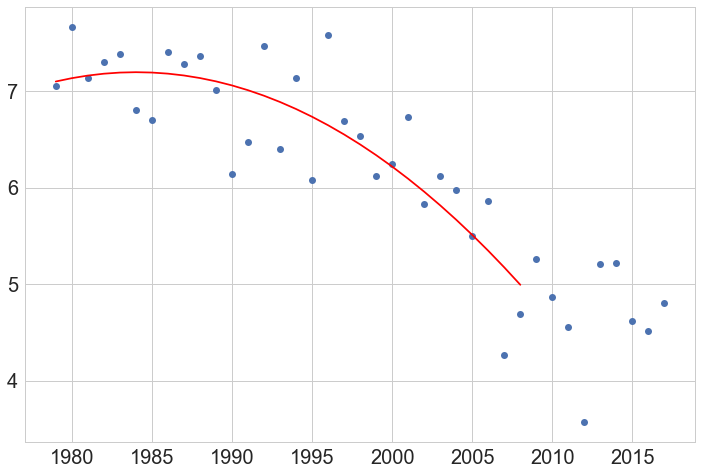

In [13]:
year = data['year']
extent = data[' extent']

plt.figure(figsize=(12,8))
plt.plot(year, extent, 'o')

extent = extent[:30]
year = year[:30]



quadratic, linear, intercept = np.polyfit(year, extent, 2)
yfit = quadratic*year**2 + linear*year + intercept


plt.plot(year, yfit, 'r-')


rvalue = np.sqrt(1 - ((yfit - extent)**2).sum() / ((extent - np.mean(extent))**2).sum())

print(rvalue)

In [ ]:
plt.plot(year, extent - yfit, 'o')

## What about a cubic?

What goes wrong here?

0.896481618225


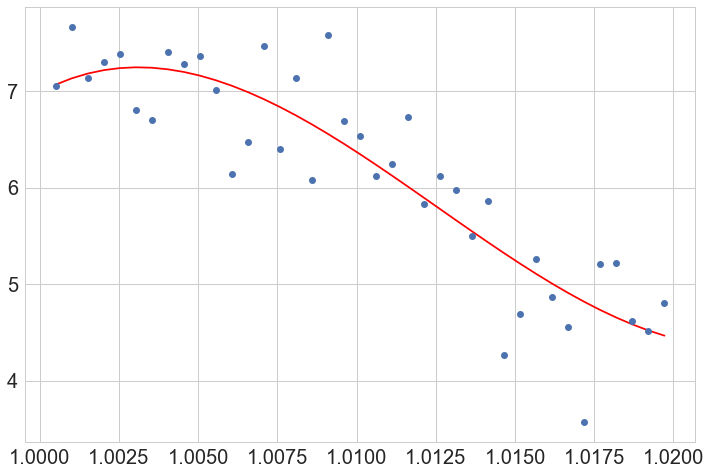

In [15]:
year = data['year']/1978
extent = data[' extent']

x3, x2, x1, x0 = np.polyfit(year, extent, 3)
yfit = x3*year**3 + x2*year**2 + x1*year + x0

plt.figure(figsize=(12,8))
plt.plot(year, yfit, 'r-')
plt.plot(year, extent, 'o')

rvalue = np.sqrt(1 - ((yfit - extent)**2).sum() / ((extent - np.mean(extent))**2).sum())

print(rvalue)

## Using Least Square function

In [ ]:
A = np.array([
    1+0*year,
    year,year**2
    ]).T

coeffs,residual,rank,sval=np.linalg.lstsq(A,extent)


def fitfunction(t,coeffs):
    return  coeffs[0]+ coeffs[1]*t + coeffs[2]*t**2


plt.plot(year, fitfunction(year,coeffs))
plt.plot(year, extent, 'o')